<a href="https://colab.research.google.com/github/itzmanibharathi/dl/blob/main/CNN%26FNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # normalize


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


#Fully Connected Neural Network


In [4]:
# Build FCNN model
# sequential is used for stack one after another
fcnn_model = models.Sequential([
    # input layer
    layers.Flatten(input_shape=(28,28)), # flatten isused to multi dimensinal to 1d

    #hidden layer 1
    layers.Dense(256, activation='relu'),# it lears the pattern
    layers.Dropout(0.2),  # reduces overfitting by ignoring some neurons

    #hidden layer 2
    layers.Dense(128, activation='relu'),# refines the pattern
    layers.Dropout(0.2),  # reduces overfitting by ignoring some neurons

    # output layer for binary classification softmax is used
    layers.Dense(10, activation='softmax') # give probality of output
])

# Compile

fcnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy', # for multi class categories data sparse_categorical_crossentropyloss function used
                   metrics=['accuracy'])

# Train
history_fcnn = fcnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate
train_loss, train_acc = fcnn_model.evaluate(x_train, y_train)
test_loss, test_acc = fcnn_model.evaluate(x_test, y_test)
print("FCNN Training Accuracy:", round(train_acc,4))
print("FCNN Test Accuracy:", round(test_acc,4))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8281 - loss: 0.5726 - val_accuracy: 0.9592 - val_loss: 0.1377
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9554 - loss: 0.1477 - val_accuracy: 0.9697 - val_loss: 0.0981
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9685 - loss: 0.1003 - val_accuracy: 0.9727 - val_loss: 0.0905
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9737 - loss: 0.0855 - val_accuracy: 0.9737 - val_loss: 0.0835
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9787 - loss: 0.0695 - val_accuracy: 0.9768 - val_loss: 0.0802
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9828 - loss: 0.0549 - val_accuracy: 0.9779 - val_loss: 0.0769
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9837 - loss: 0.0512 - val_accuracy: 0.9787 - val_loss: 0.0816
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9865 - loss: 0.0426 - val_accuracy: 0.

#Runtime ip


In [5]:
from google.colab import files  # for Colab
from tensorflow.keras.preprocessing import image
import numpy as np


In [8]:
uploaded = files.upload()  # this will open a file chooser
img_path = list(uploaded.keys())[0]  # get the uploaded filename


Saving sample_image (1).png to sample_image (1).png


In [ ]:
# Load and resize to 28x28 grayscale
img = image.load_img(img_path, target_size=(28,28), color_mode='grayscale')

# Convert to array
img_array = image.img_to_array(img)

# Normalize
img_array = img_array / 255.0

# Add batch dimension
img_array = np.expand_dims(img_array, axis=0)
prediction = fcnn_model.predict(img_array)
predicted_class = np.argmax(prediction)
print("Predicted digit:", predicted_class)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 294ms/step
Predicted digit: 7


#Convolutional Neural Network


In [6]:
# Build CNN
cnn_model = models.Sequential([
    #input layer
    layers.Reshape((28,28,1), input_shape=(28,28)),# to convert 2d image 28x28 into 28 height,28 width,1 channel black

    layers.Conv2D(32, 3, activation='relu'), # 32filters and 3 kernal 3x3 matrix type
    layers.MaxPooling2D(2),# to get maximum value in the filter
    layers.Conv2D(64, 3, activation='relu'), # 64filters and 3 kernal 3x3 matrix type
    layers.MaxPooling2D(2),
    layers.Flatten(),
    layers.Dense(128, activation='relu'), # 128 filters and 3 kernal 3x3 matrix type
    layers.Dropout(0.3),#reduce overfit

    # output layer
    layers.Dense(10, activation='softmax')
])

# Compile
cnn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Train
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.1)

# Evaluate
train_loss, train_acc = cnn_model.evaluate(x_train, y_train)
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print("CNN Training Accuracy:", round(train_acc,4))
print("CNN Test Accuracy:", round(test_acc,4))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8565 - loss: 0.4683 - val_accuracy: 0.9823 - val_loss: 0.0574
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9765 - loss: 0.0791 - val_accuracy: 0.9860 - val_loss: 0.0450
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9839 - loss: 0.0520 - val_accuracy: 0.9888 - val_loss: 0.0363
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9863 - loss: 0.0452 - val_accuracy: 0.9890 - val_loss: 0.0380
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9896 - loss: 0.0321 - val_accuracy: 0.9903 - val_loss: 0.0363
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9918 - loss: 0.0265 - val_accuracy: 0.9915 - val_loss: 0.0320
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9933 - loss: 0.0218 - val_accuracy: 0.9927 - val_loss: 0.0316
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0206 - val_accuracy: 0

#CNN Sample Input


In [9]:
img = image.load_img(img_path, target_size=(28,28), color_mode='grayscale')
img_array = image.img_to_array(img)
img_array = img_array / 255.0

img_cnn = np.expand_dims(img_array, axis=0)  # shape (1,28,28,1)
prediction_cnn = cnn_model.predict(img_cnn)
predicted_class_cnn = np.argmax(prediction_cnn)
print("CNN Predicted Digit:", predicted_class_cnn)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
CNN Predicted Digit: 7


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


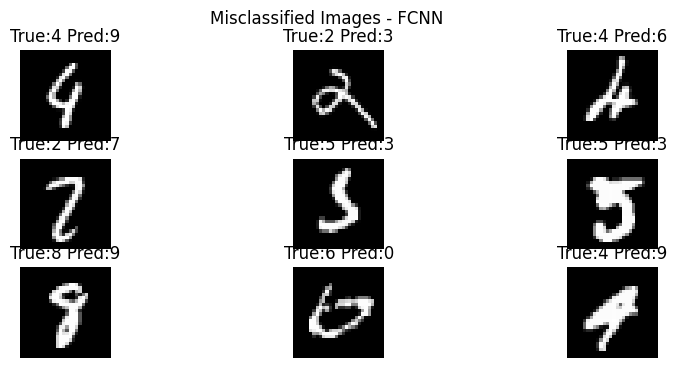

In [15]:
misclassified_idx_fcnn = np.where(y_pred_fcnn != y_test)[0]

plt.figure(figsize=(10,4))
for i, idx in enumerate(misclassified_idx_fcnn[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True:{y_test[idx]} Pred:{y_pred_fcnn[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified Images - FCNN")
plt.show()

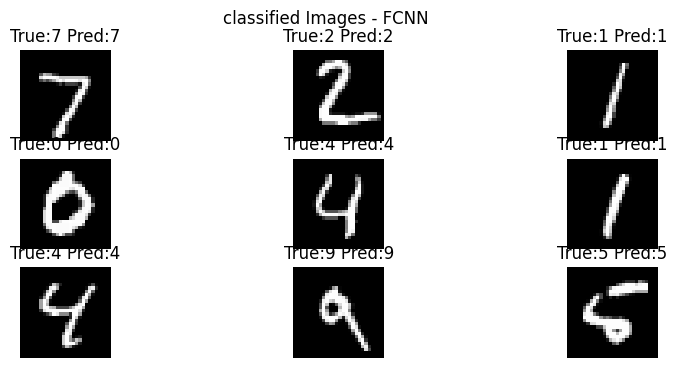

In [17]:
misclassified_idx_fcnn = np.where(y_pred_fcnn == y_test)[0]

plt.figure(figsize=(10,4))
for i, idx in enumerate(misclassified_idx_fcnn[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True:{y_test[idx]} Pred:{y_pred_fcnn[idx]}")
    plt.axis('off')
plt.suptitle("classified Images - FCNN")
plt.show()

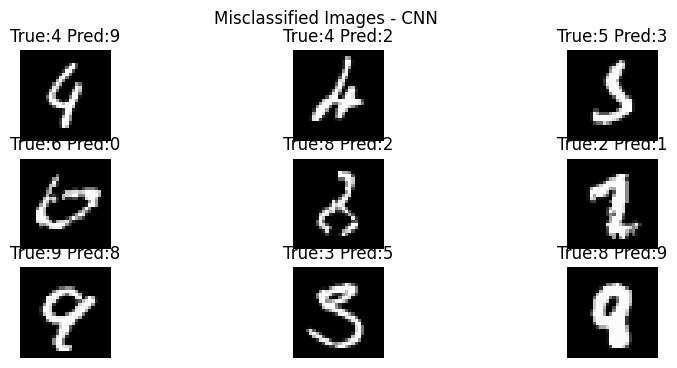

In [16]:
misclassified_idx_cnn = np.where(y_pred_cnn != y_test)[0]

plt.figure(figsize=(10,4))
for i, idx in enumerate(misclassified_idx_cnn[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True:{y_test[idx]} Pred:{y_pred_cnn[idx]}")
    plt.axis('off')
plt.suptitle("Misclassified Images - CNN")
plt.show()

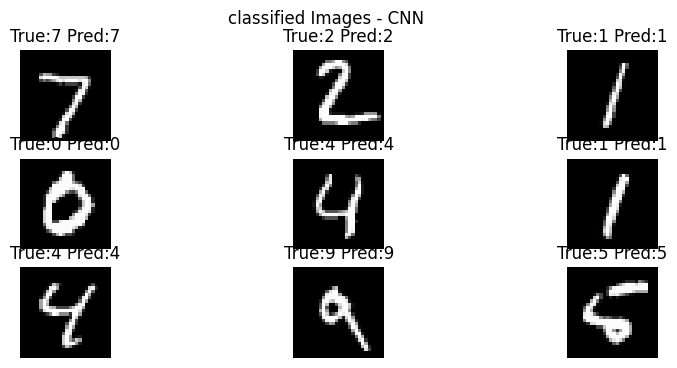

In [18]:
misclassified_idx_cnn = np.where(y_pred_cnn == y_test)[0]

plt.figure(figsize=(10,4))
for i, idx in enumerate(misclassified_idx_cnn[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"True:{y_test[idx]} Pred:{y_pred_cnn[idx]}")
    plt.axis('off')
plt.suptitle("classified Images - CNN")
plt.show()

In [19]:
y_pred_fcnn = np.argmax(fcnn_model.predict(x_test), axis=1)
x_test_cnn = np.expand_dims(x_test, axis=-1)  # shape: (num_samples, 28, 28, 1)
y_pred_cnn = np.argmax(cnn_model.predict(x_test_cnn), axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [20]:
cm_fcnn = confusion_matrix(y_test, y_pred_fcnn)
cm_cnn = confusion_matrix(y_test, y_pred_cnn)


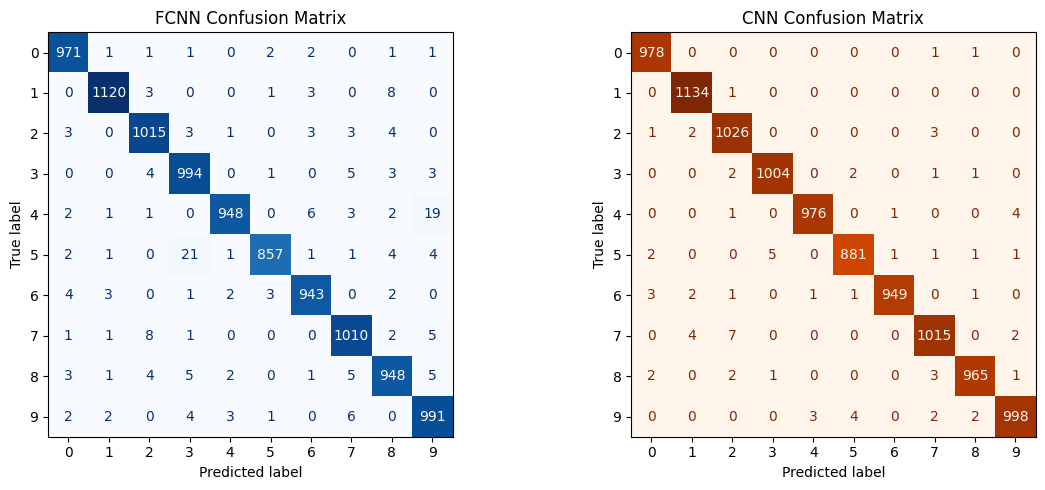

In [21]:
plt.figure(figsize=(12,5))

# FCNN
plt.subplot(1,2,1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_fcnn)
disp.plot(cmap=plt.cm.Blues, ax=plt.gca(), colorbar=False)
plt.title("FCNN Confusion Matrix")

# CNN
plt.subplot(1,2,2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_cnn)
disp.plot(cmap=plt.cm.Oranges, ax=plt.gca(), colorbar=False)
plt.title("CNN Confusion Matrix")

plt.tight_layout()
plt.show()
